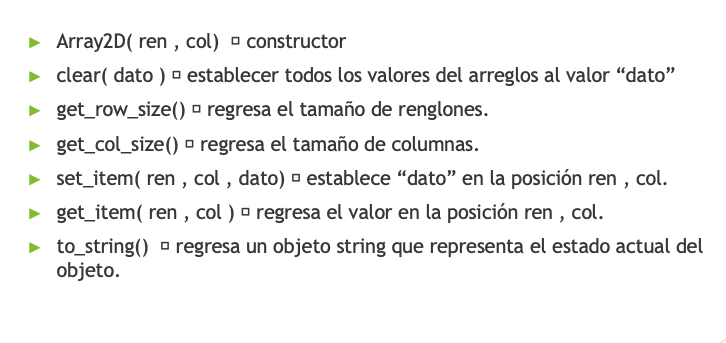

In [7]:
class Array2dADT:
  def __init__(self, ren, col):
    self.__pollo = [ [0 for y in range (col)] for x in range (ren)]
    print(self.__pollo)

  def clear( self, dato):
    self.__pollo = [ [ dato for y in range(self.get_col_size()) ] for x in range(self.get_row_size()) ] 

  def get_row_size(  self ):
    return len(self.__pollo)

  def get_col_size( self ):
    return len( self.__pollo[0] )

  def set_item(self, ren , col , dato):
    self.__pollo[ren][col] = dato
     
  def get_item(self, ren , col):
    return self.__pollo[ren][col]

  def to_string(self):
    cadena = ""
    for renglon in self.__pollo:
      cadena = cadena + "|"
      for dato in renglon:
        cadena = cadena + str(dato) + " | "
      cadena = cadena + "\n"
    return cadena   



In [8]:
a2d = Array2dADT(3 , 6)
print(f'Renglones: {a2d.get_row_size()}')
print(f'Columnas: {a2d.get_col_size()}')
print(a2d.to_string())
print("")
a2d.clear("M")
print(a2d.to_string())

a2d.set_item(2,3,'p')
print(a2d.to_string())
print(a2d.get_item(2, 3))

[[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]
Renglones: 3
Columnas: 6
|0 | 0 | 0 | 0 | 0 | 0 | 
|0 | 0 | 0 | 0 | 0 | 0 | 
|0 | 0 | 0 | 0 | 0 | 0 | 


|M | M | M | M | M | M | 
|M | M | M | M | M | M | 
|M | M | M | M | M | M | 

|M | M | M | M | M | M | 
|M | M | M | M | M | M | 
|M | M | M | p | M | M | 

p


In [29]:
"""
Los datos inciales como lo son:
1. Tamaño de la poblacion ( ren y colum)
2. La poblacion inicial
3. El numero de generaciones a simular 
estaran proporcionadas por un archivo de entrada separado por comas (CSV)

5 renglones 
5 columnas
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0    Población inicial
0,0,0,0,0
0,0,0,0,0
10 Generaciones 

"""
class JuegoDeLaVida:
  def __init__( self , ruta_archivo): 
    self.rens = None  
    self.colum = None
    self.tablero = None
    self.generaciones = None
    self.read_game_data( ruta_archivo )
  
  def read_game_data(self, archivo):
    archivo = open( archivo , 'rt')
    lineas = archivo.readlines()
    for index in range(len(lineas)): #Esto es para eliminar los \n
      lineas[index] = lineas[index].strip()  #El .strip sirve para eliminar los espacios en blanco y saltos de linea
    #print(lineas)
    self.rens = int ( lineas[ 0 ] ) 
    self.colum = int ( lineas[ 1 ] )
    self.tablero = Array2dADT(self.rens, self.colum)
    r = 0
    c = 0
    for index in range(2, 2 + self.rens, 1):
      c=0
      for dato in lineas[index].split(','):
          self.tablero.set_item( r , c , int(dato))
          c += 1
      r += 1

    self.generaciones = int (lineas [-1]  )
    print(self.tablero.to_string())      
    print("Generaciones: " ,self.generaciones)
    


  def get_vecinos( self , r , c):
      vecinos = []
      for ren in range( r-1 , r+2 , 1 ):
          for col in range(c-1 , c+2 , 1):
              if ren < 0 or ren >= self.tablero.get_row_size() or col < 0 or col >= self.tablero.get_col_size() or (ren==r and col==c):
                  pass
              else:
                  vecinos.append((ren,col))
      return vecinos
  def get_vecinos_vivos(self, r , c):
    vecinos = self.get_vecinos(r, c)
    vivos = 0
    for par in vecinos:
      if self.tablero.get_item( par[0], par [1]) == 1:
        vivos +=1 
    return vivos



  def calcular_siguiente(self):
    nueva_gen = Array2dADT (self.rens , self.colum)
    # Aplicar 4 reglas a cada celula y el resultado ponerlo en nueva_gen 
    for ren in range(self.rens):
      for col in range( self.colum):
        gen = self.tablero.get_item(ren , col)
        vecinos = self.get_vecinos_vivos(ren , col)
        if gen == 1:
          # Regla 1
          if vecinos == 2 or vecinos == 3:
            nueva_gen.set_item(ren , col , 1)
          # Regla 2
          elif vecinos == 1 or vecinos == 0:
            nueva_gen.set_item( ren , col , 0)
        else:
        # Regla 3  
          if vecinos >= 4:
            nueva_gen.set_item( ren, col , 0)
          else:
        # Regla 4    
            if vecinos == 3:
              nueva_gen.set_item( ren, col , 1)

    self.tablero = nueva_gen
    print(self.tablero.to_string())





In [32]:
juego = JuegoDeLaVida( 'entrada.txt')
#juego.get_vecinos(4,4)
juego.get_vecinos_vivos(1 , 2)
juego.calcular_siguiente()



[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
|0 | 0 | 1 | 0 | 0 | 0 | 0 | 
|0 | 1 | 1 | 1 | 0 | 0 | 0 | 
|1 | 0 | 0 | 0 | 0 | 0 | 0 | 
|0 | 0 | 0 | 0 | 0 | 0 | 0 | 
|0 | 0 | 0 | 0 | 0 | 0 | 0 | 
|11 | 0 | 0 | 0 | 0 | 0 | 0 | 

Generaciones:  11
[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
|0 | 1 | 1 | 1 | 0 | 0 | 0 | 
|0 | 1 | 1 | 1 | 0 | 0 | 0 | 
|0 | 1 | 1 | 0 | 0 | 0 | 0 | 
|0 | 0 | 0 | 0 | 0 | 0 | 0 | 
|0 | 0 | 0 | 0 | 0 | 0 | 0 | 
|0 | 0 | 0 | 0 | 0 | 0 | 0 | 



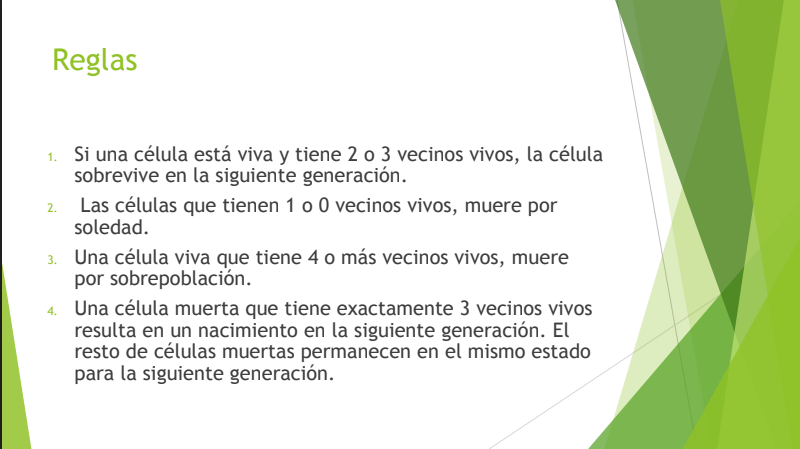